In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

from mne.io import read_raw_fif
from mne_bids import BIDSPath
from nilearn.plotting import plot_markers

In [2]:
result_path = BIDSPath(
    root="../results", datatype="erp", extension=".h5", check=False
)
result_files = result_path.match()
len(result_files)

9

In [3]:
sub_evoked = []
for result_path in result_files:
    with h5py.File(result_path, "r") as f:
        evoked = f['evoked'][...]
        lags = f['lags'][...]

        sub_evoked.append(evoked)

all_xcorrs = np.vstack(sub_evoked)
print(all_xcorrs.shape)

(1159, 2049)


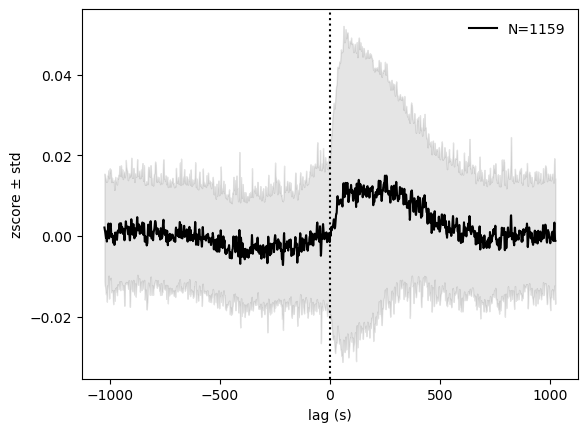

In [4]:
mean = all_xcorrs.mean(0)
err = all_xcorrs.std(0)# / np.sqrt(all_xcorrs.shape[0])

fig, ax = plt.subplots()
ax.axvline(0, c='k', ls=':')
ax.fill_between(lags, mean - err, mean + err, alpha=0.1, color='k')
ax.plot(lags, mean, color='k', label=f"N={len(all_xcorrs)}")
ax.set_xlabel("lag (s)")
ax.set_ylabel("zscore ± std")
ax.legend(frameon=False, loc='best')
fig.show()

In [5]:
# get coords
edf_path = BIDSPath(root="../../monkey/derivatives/ecogprep", datatype="ieeg", description="highgamma", extension=".fif")

sub_coords = []
sub_ch_names = []
for raw_fif in edf_path.match():
    print(raw_fif)
    raw = read_raw_fif(raw_fif, verbose=False)
    ch2loc = {ch['ch_name']: ch['loc'][:3] for ch in raw.info['chs']}
    coords = np.vstack([ch2loc[ch] for ch in raw.info['ch_names']])

    sub_coords.append(coords)
    sub_ch_names.append(raw.info['ch_names'])

../../monkey/derivatives/ecogprep/sub-01/ieeg/sub-01_task-monkey_desc-highgamma_ieeg.fif


../../monkey/derivatives/ecogprep/sub-02/ieeg/sub-02_task-monkey_desc-highgamma_ieeg.fif


../../monkey/derivatives/ecogprep/sub-03/ieeg/sub-03_task-monkey_desc-highgamma_ieeg.fif


../../monkey/derivatives/ecogprep/sub-04/ieeg/sub-04_task-monkey_desc-highgamma_ieeg.fif


../../monkey/derivatives/ecogprep/sub-05/ieeg/sub-05_task-monkey_desc-highgamma_ieeg.fif


../../monkey/derivatives/ecogprep/sub-06/ieeg/sub-06_task-monkey_desc-highgamma_ieeg.fif


../../monkey/derivatives/ecogprep/sub-07/ieeg/sub-07_task-monkey_desc-highgamma_ieeg.fif


../../monkey/derivatives/ecogprep/sub-08/ieeg/sub-08_task-monkey_desc-highgamma_ieeg.fif
../../monkey/derivatives/ecogprep/sub-09/ieeg/sub-09_task-monkey_desc-highgamma_ieeg.fif


In [6]:
values = all_xcorrs.max(-1)
coords = np.vstack(sub_coords) * 1000
values.shape, coords.shape

((1159,), (1159, 3))

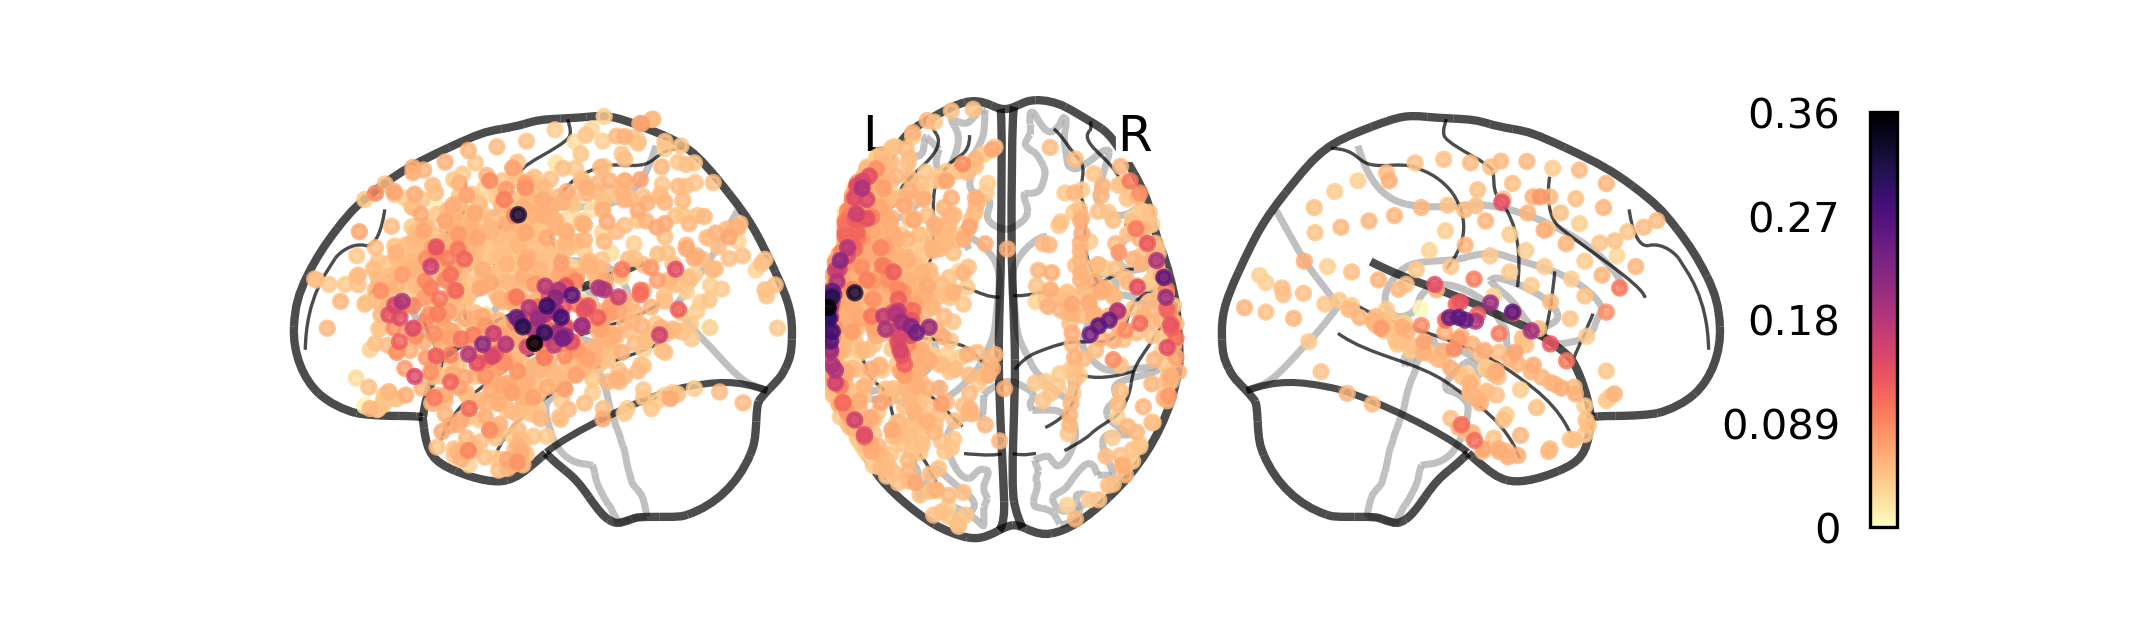

In [7]:
order = values.argsort()
fig, ax = plt.subplots(figsize=(7, 2), layout='constrained', dpi=300)
plot_markers(values[order], coords[order],
                node_size=10, display_mode='lzr',
                node_cmap='magma_r', colorbar=True,
                alpha=0.8, node_vmin=0,
                figure=fig, axes=ax)
fig.show()

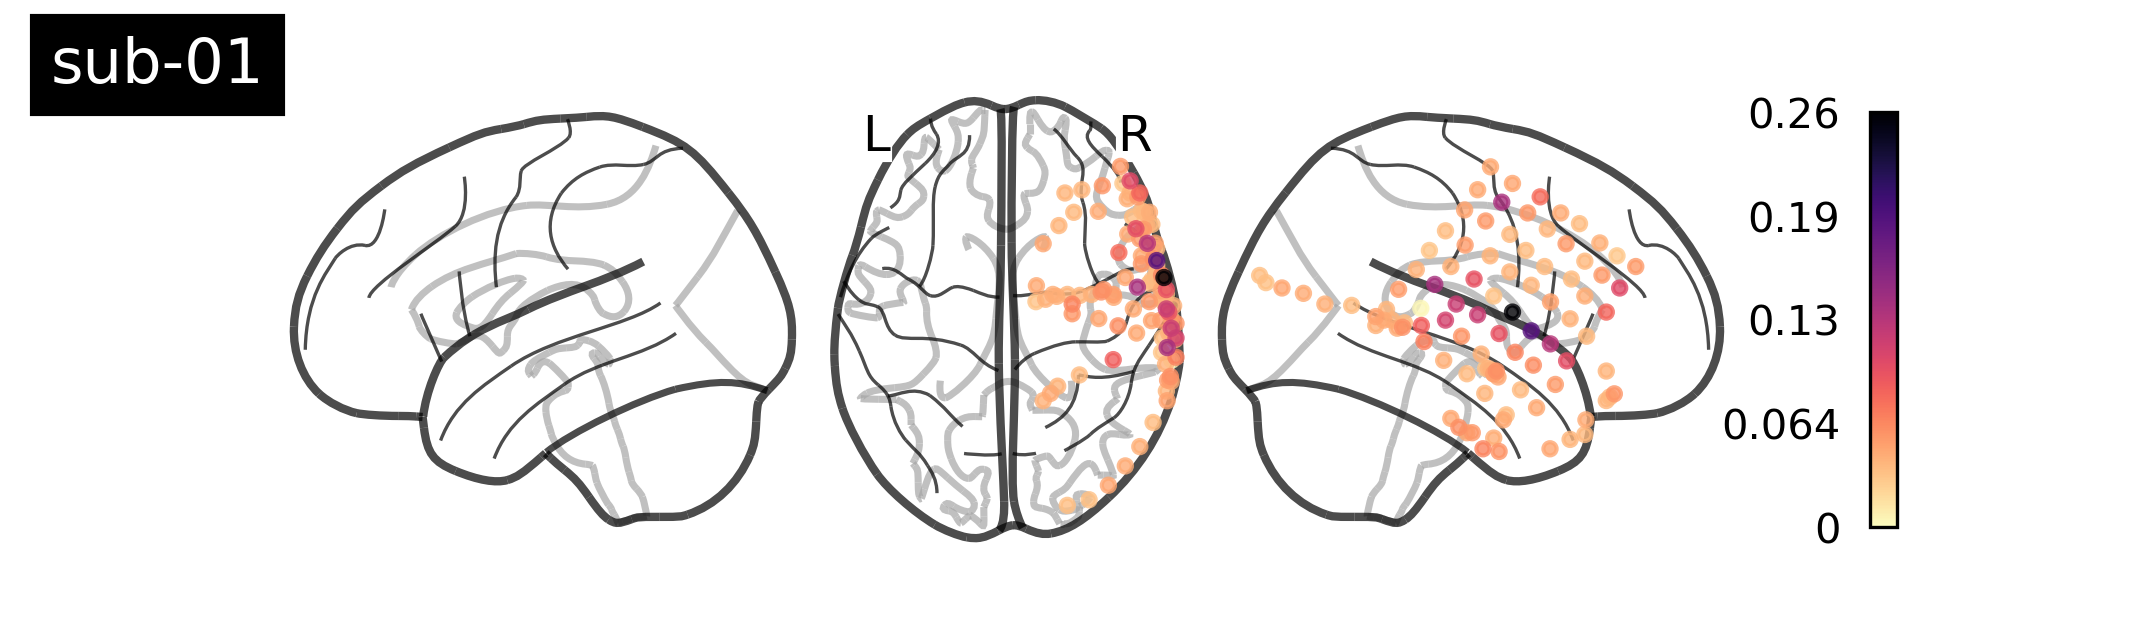

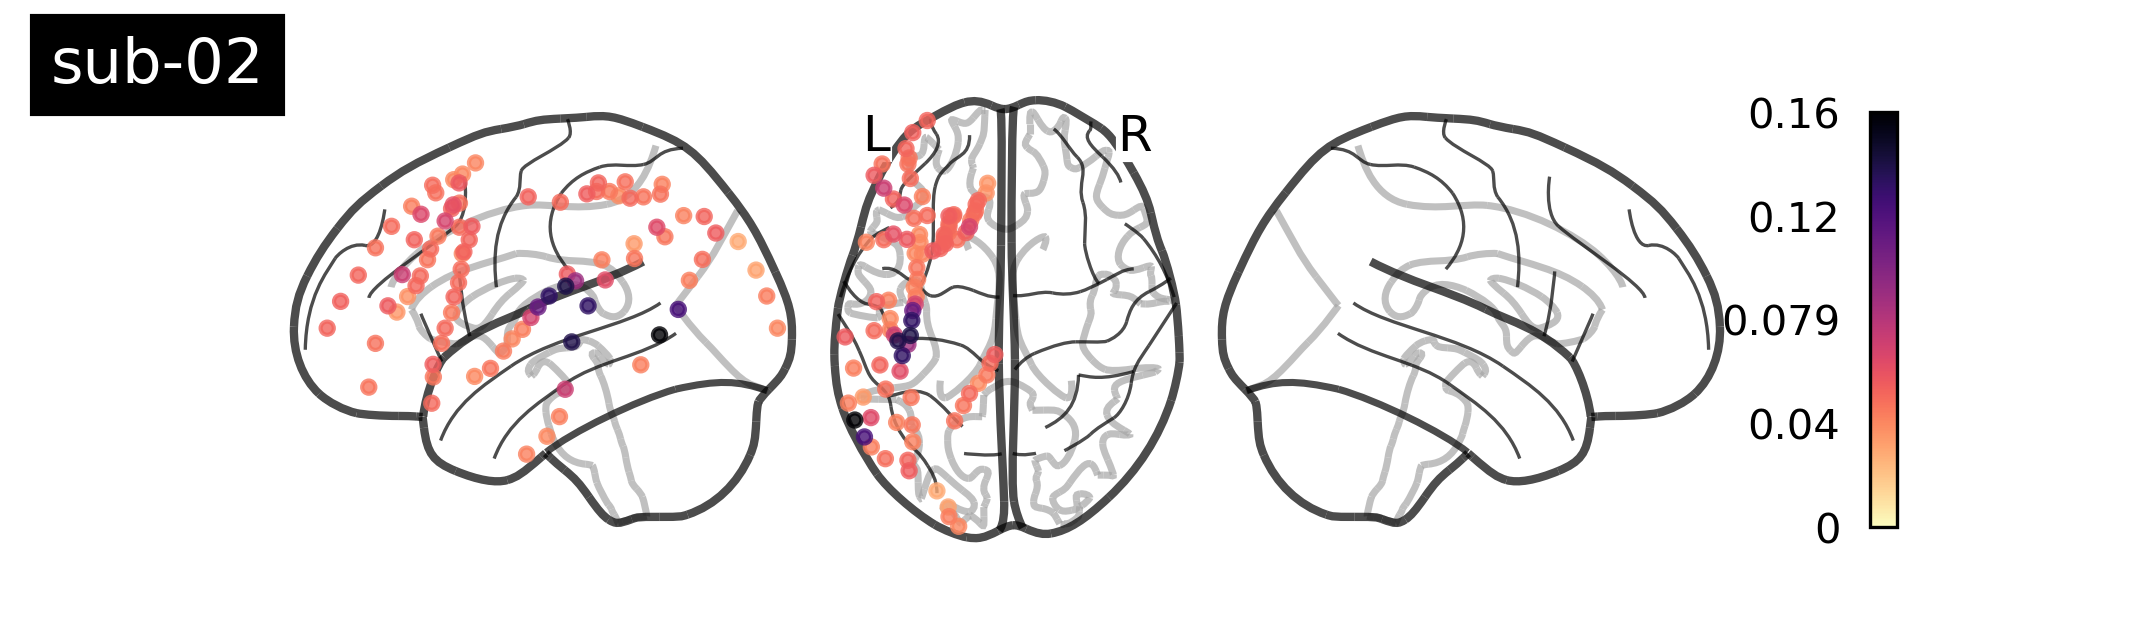

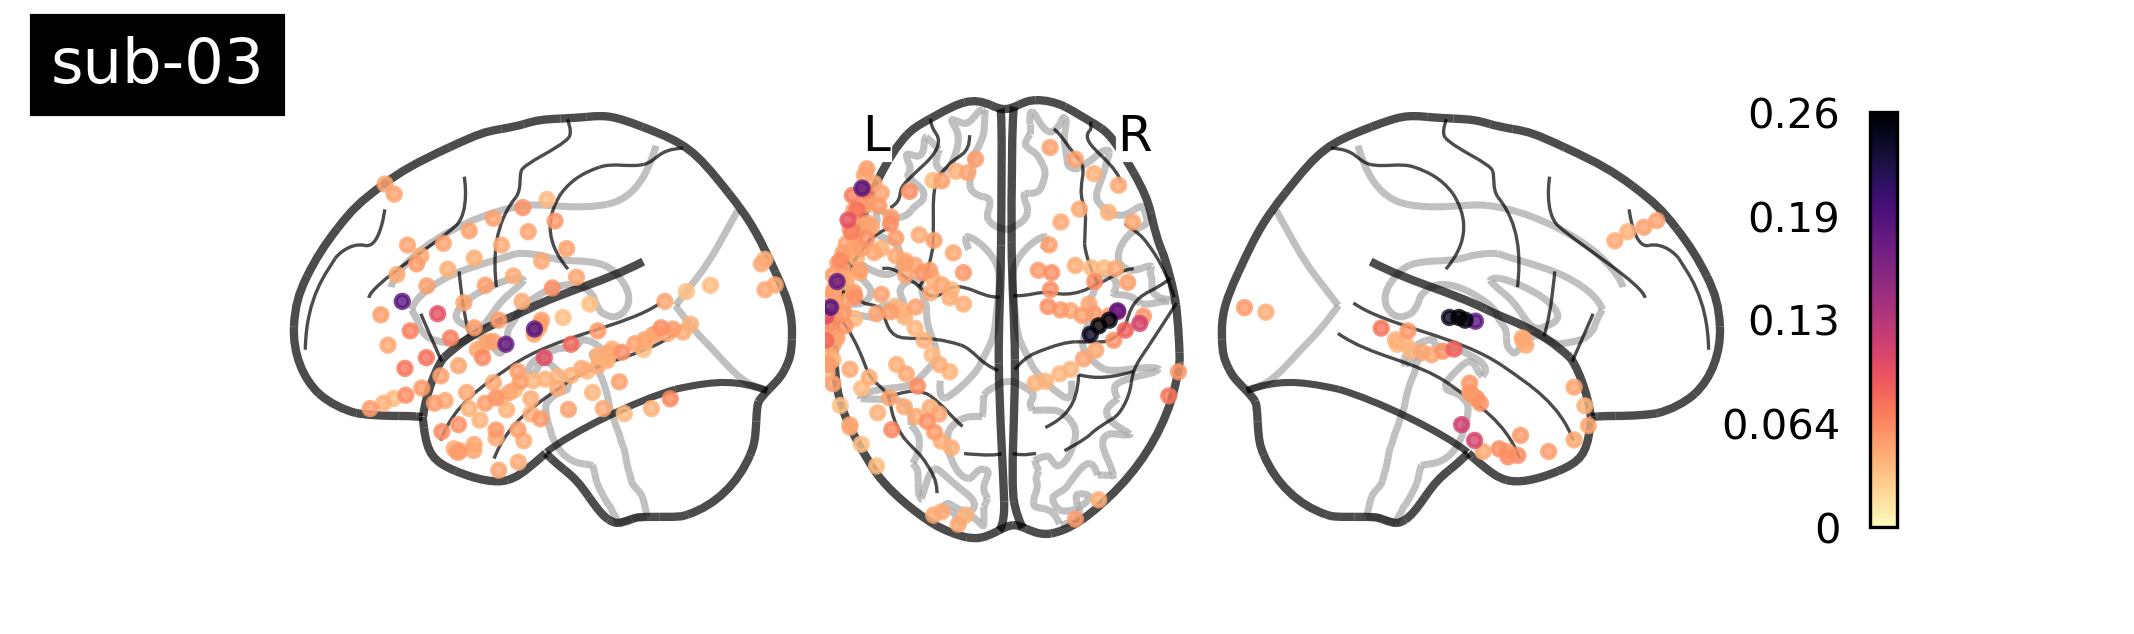

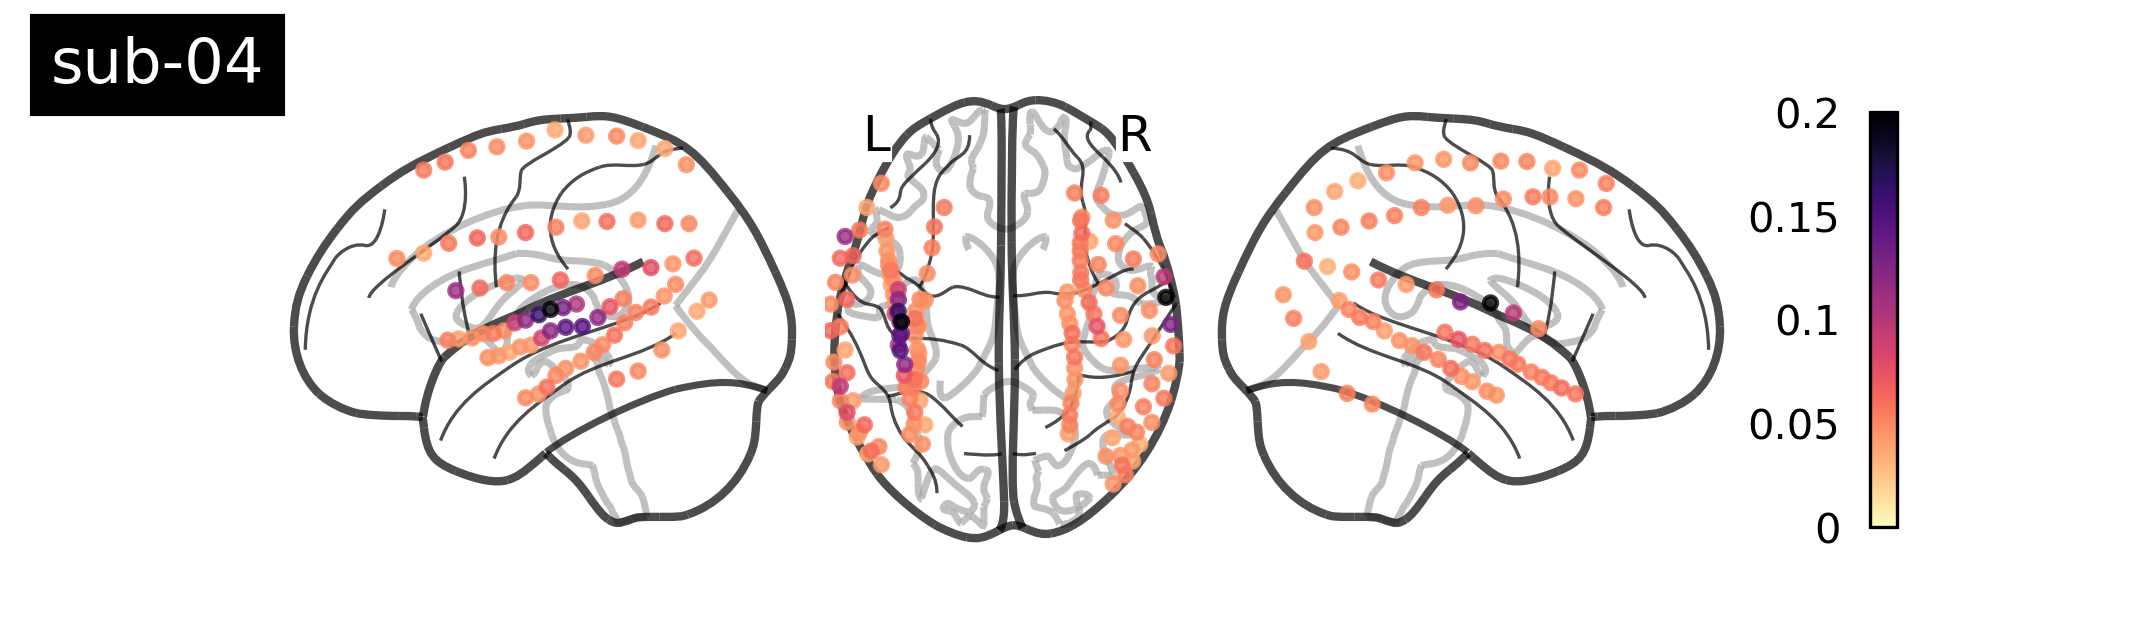

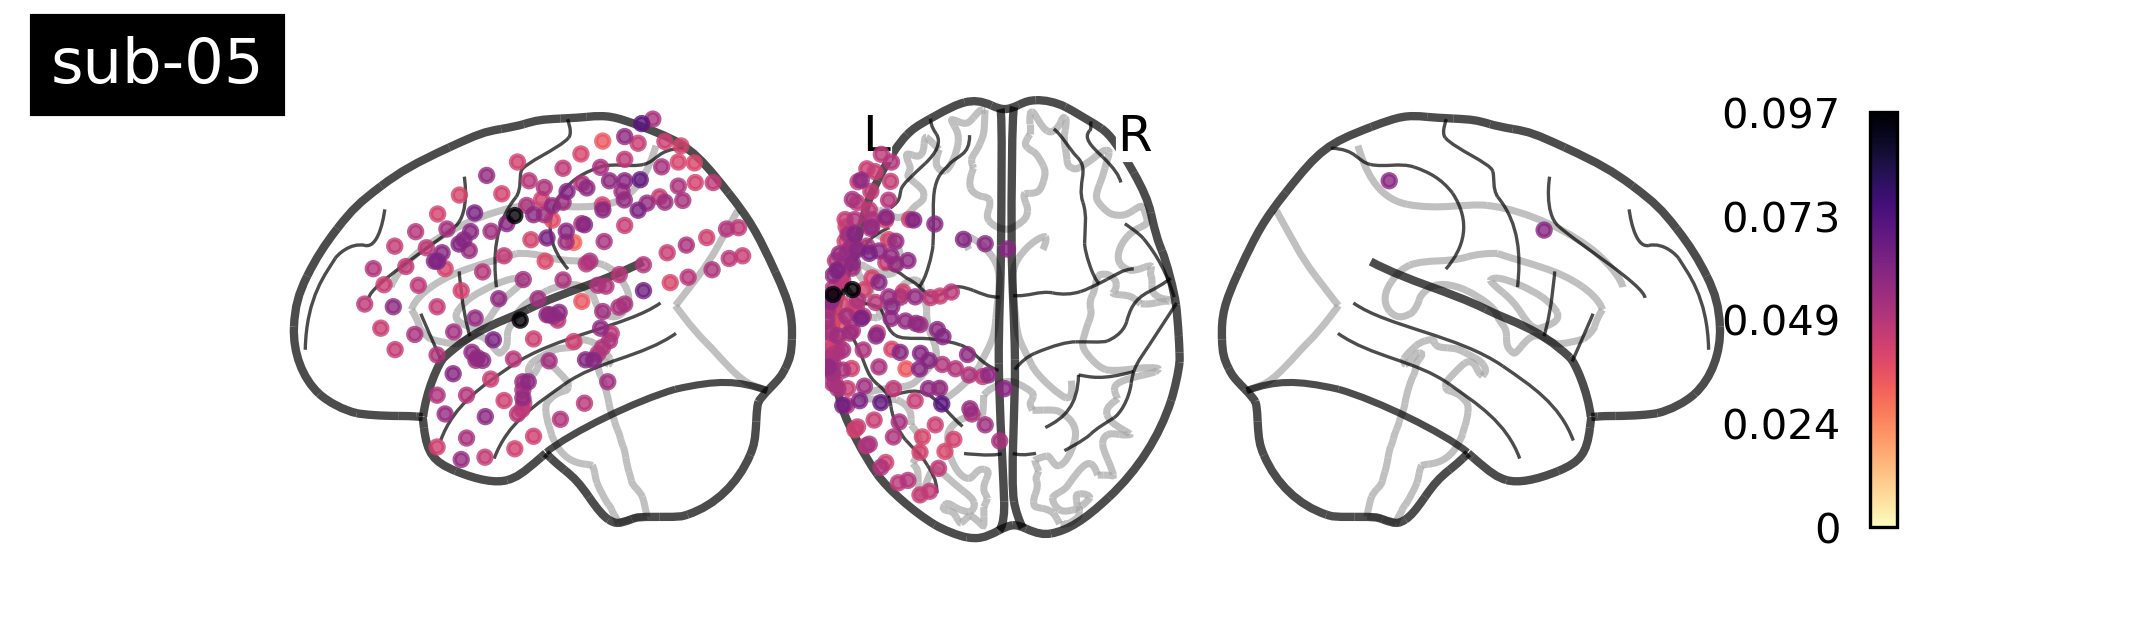

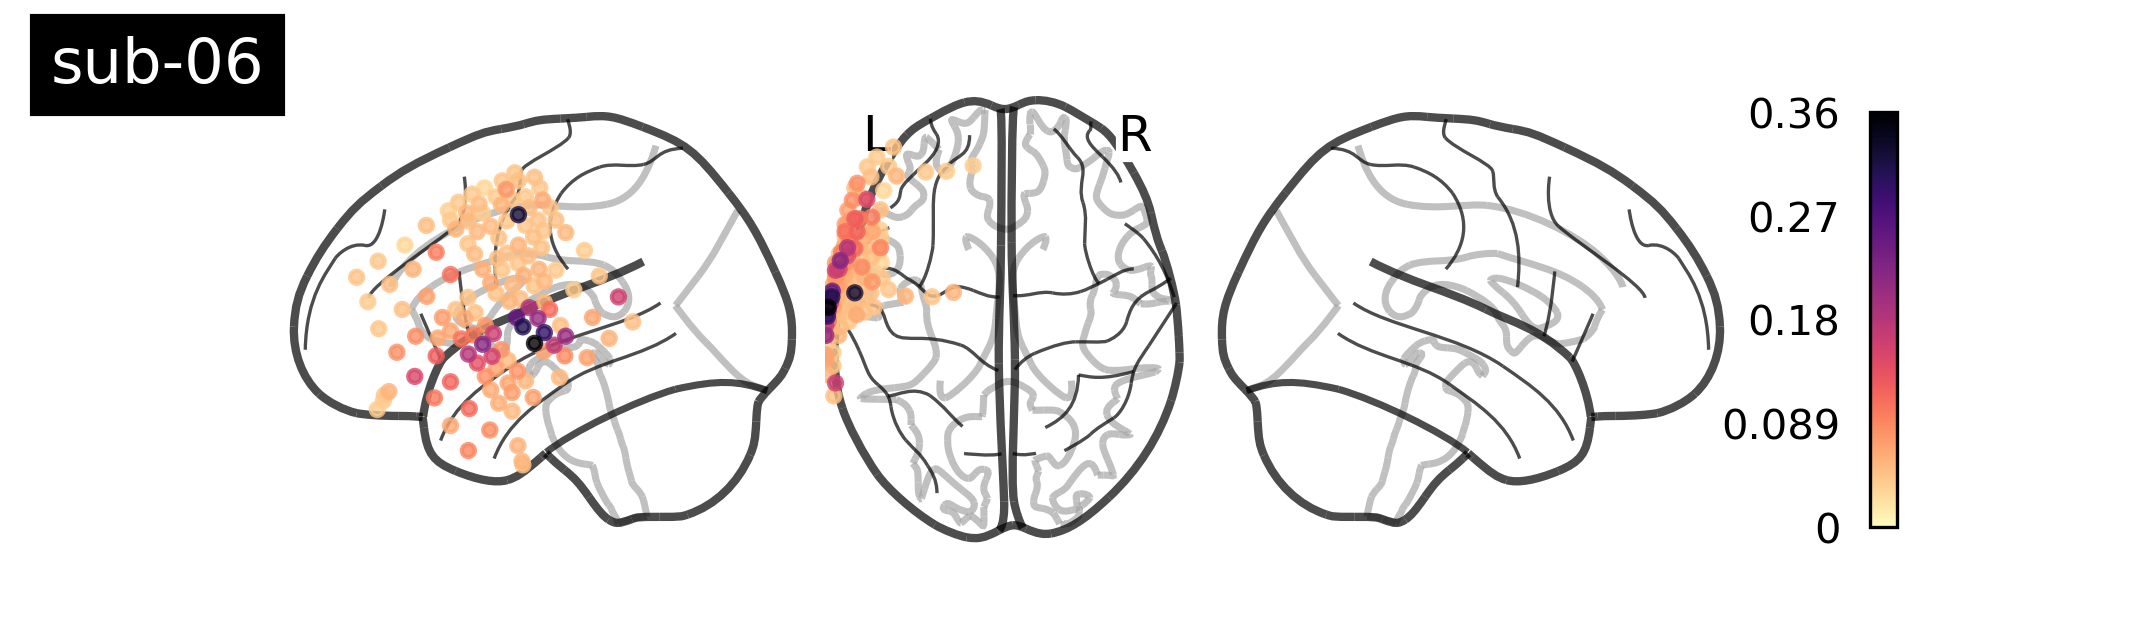

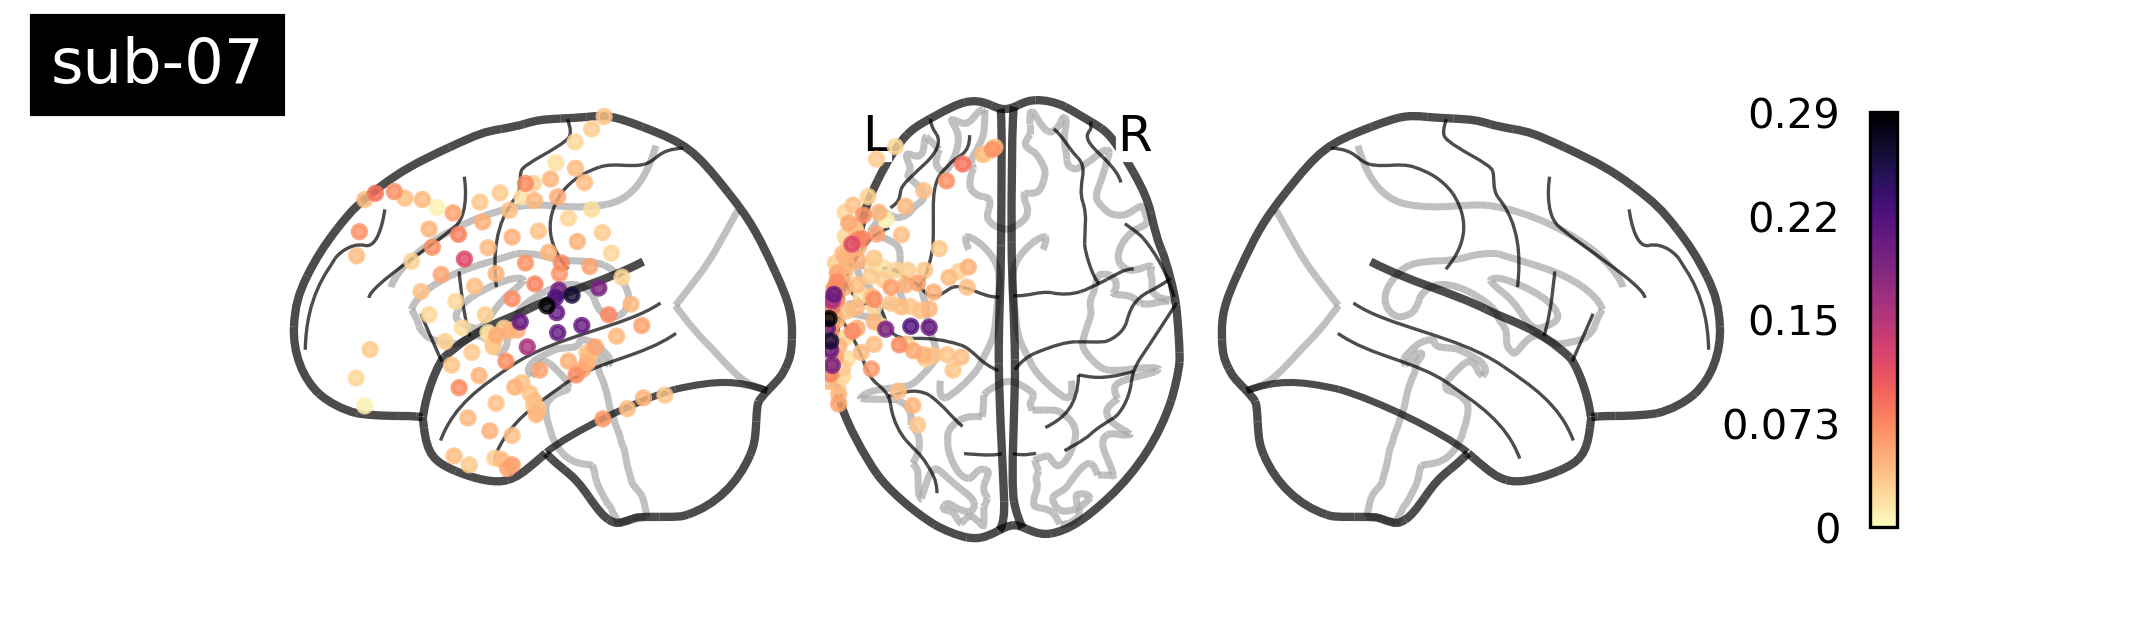

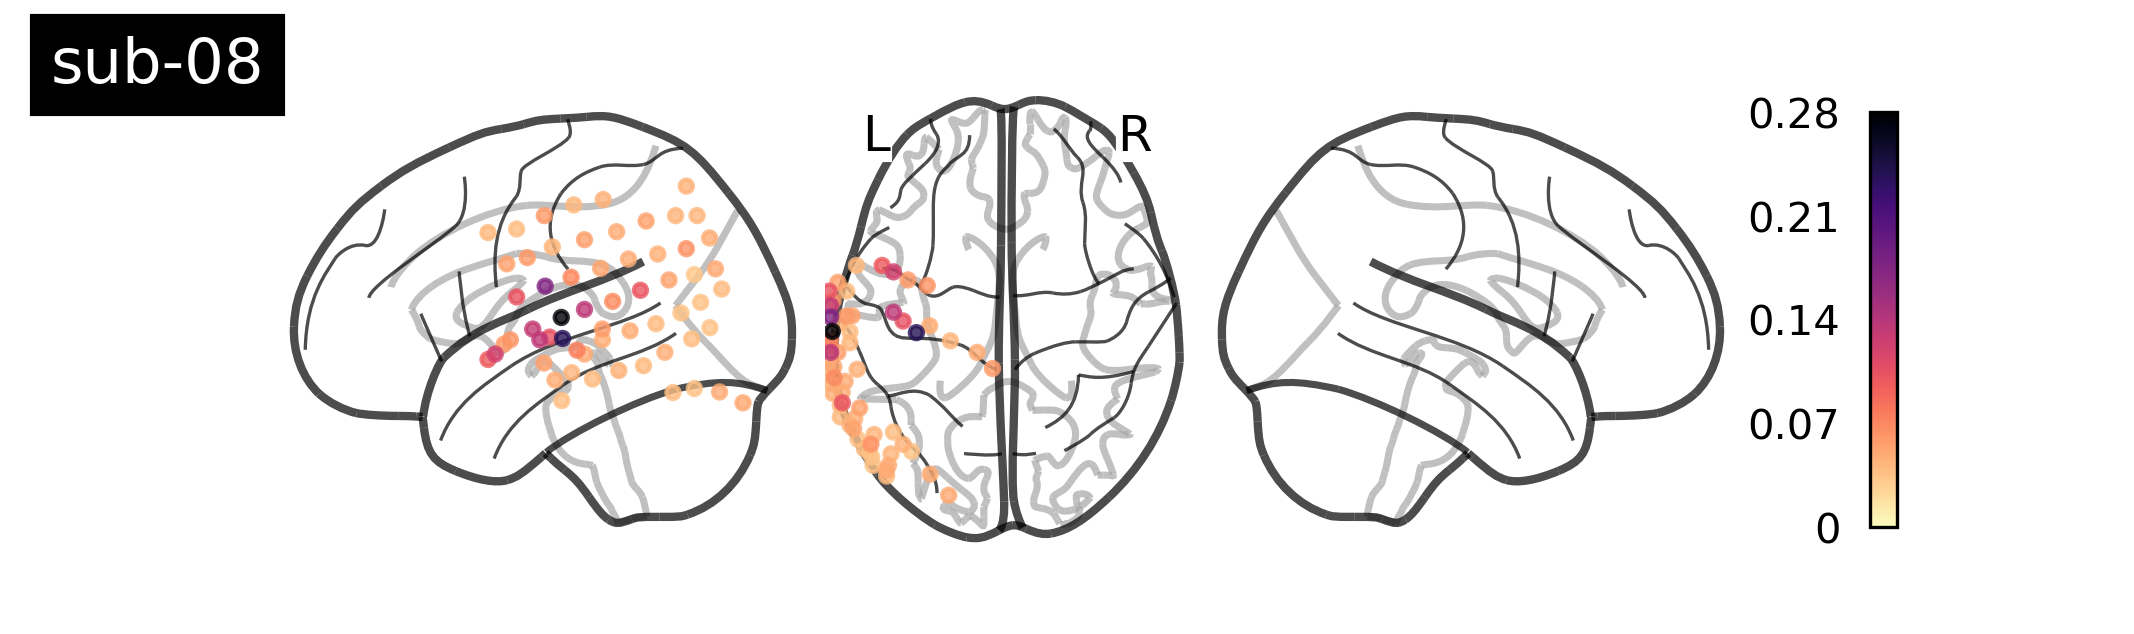

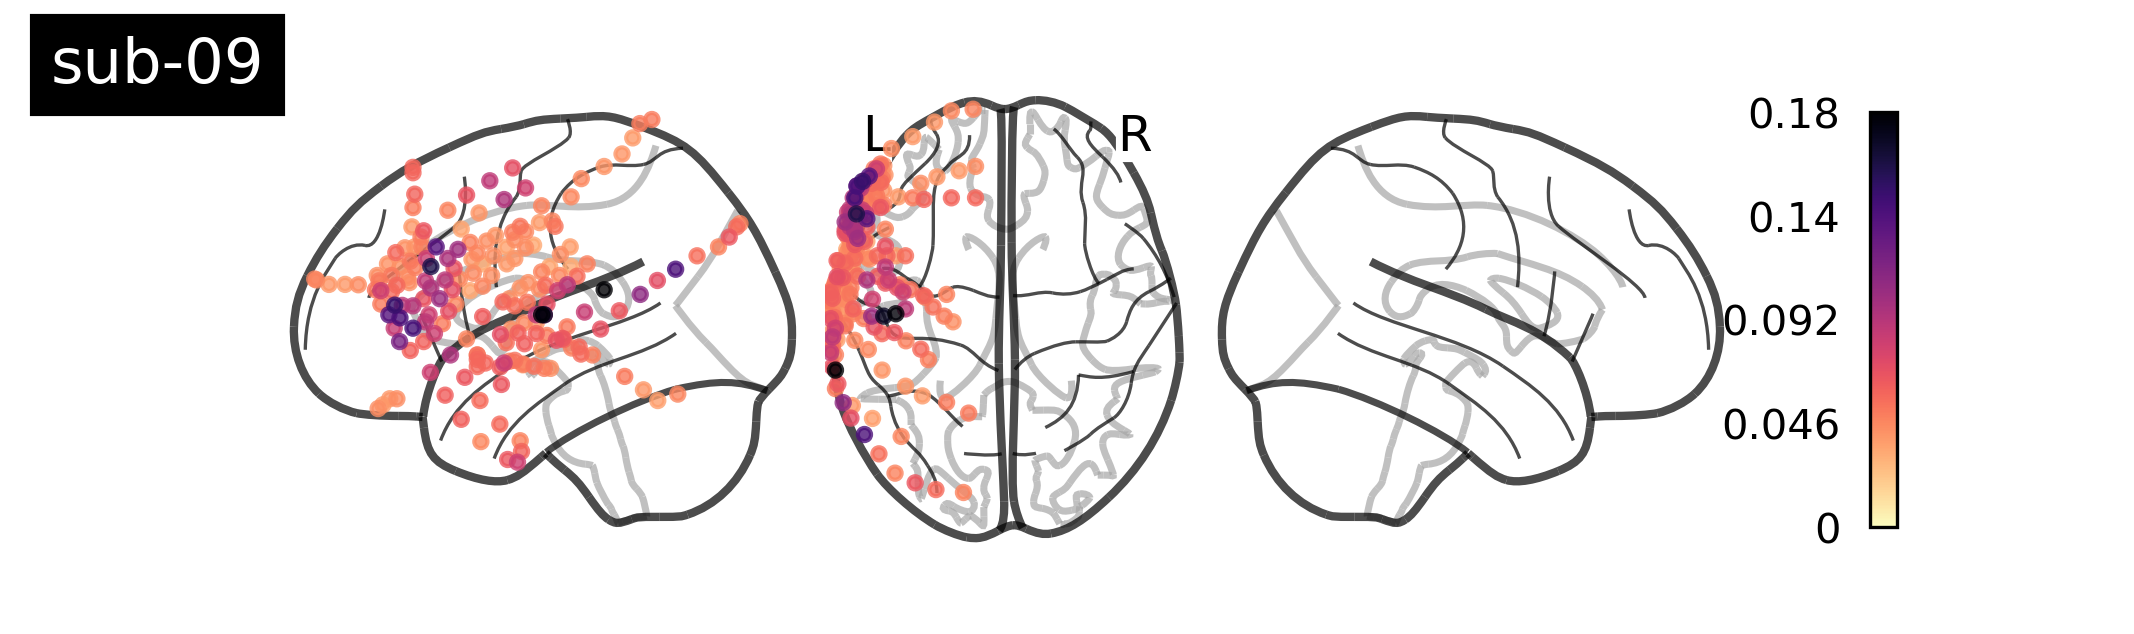

In [8]:
for i in range(len(sub_coords)):
    values = sub_evoked[i].max(-1)
    coords = sub_coords[i] * 1000
    order = values.argsort()
    fig, ax = plt.subplots(figsize=(7, 2), layout='constrained', dpi=300)
    plot_markers(values[order], coords[order],
                    node_size=10, display_mode='lzr',
                    node_cmap='magma_r', colorbar=True,
                    alpha=0.8, node_vmin=0, title=f'sub-{i+1:02d}',
                    figure=fig, axes=ax)
    fig.show()